In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

In [5]:
x = np.arange(-15,20,.4)
y = x*(np.random.rand(np.size(x)) - .5)
z = np.sin(x) +np.cos(y)

# plt.subplots(figsize=(16,8))
# plt.subplot(2,2,1)
# plt.plot(x,y)

# plt.subplot(2,2,2)
# plt.plot(x,z)

# plt.subplot(2,2,3)
# plt.plot(y,z)
# plt.show()

# xx, yy = np.meshgrid(x,y)

# f = ax.plot_surface(x,y,xx, cmap = cm.jet)
# plt.show(f)


# print(xx, '\n\n', yy)

x = np.arange(0,2*np.pi,.1)
y = x
xx, yy = np.meshgrid(x,y)
z = np.sin(xx*5 + yy*5)
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.plot_surface(xx,yy,z, rstride=1, cstride=1, cmap=cm.viridis)
# plt.contourf(x,y,z)
plt.show()
# print(xx, '\n\n', yy)
xx, yy

NameError: name 'Axes3D' is not defined

In [6]:
def fourier_transform_2D(function):
    
    Nrow = np.size(Z, 0) # num rows
    Ncol = np.size(Z, 1) # num columns
    xr = np.arange(0,Nrow,1)
    xc = np.arange(0,Ncol,1)
    first_transform = np.empty(np.shape(function), dtype=np.complex)
    second_transform = np.empty(np.shape(function), dtype=np.complex)

    for i in range(0,Nrow):
        for n in range(0,Ncol):
            integrand = function[i,:]*np.exp(n*(-1j)*xc*2*np.pi/Ncol)
            first_transform[i,n] = sum(integrand)
    for i in range(0,Ncol):
        for n in range(0,Nrow):
            integrand = first_transform[:,i]*np.exp(n*(-1j)*xr*2*np.pi/Nrow)
            second_transform[n,i] = sum(integrand)
    
    return second_transform

In [7]:
def fourier_transform_frequencies(size_of_function, smaple_rate):
    
    N = size_of_function
    kvalues = np.empty(N)
    
    if N % 2 == 0:
        kvaluesoriginal = np.linspace(-N/2,(N/2)-1,N)/(sample_rate*N)
    else:
        kvaluesoriginal = np.linspace(-(N-1)/2,(N-1)/2,N)/(sample_rate*N)
    newN = int(N/2)
    if N % 2 == 0:
        kvalues[0:newN] = kvaluesoriginal[newN:N]
        kvalues[newN:N] = kvaluesoriginal[0:newN]
    if N % 2 != 0:
        kvalues[0:newN+1] = kvaluesoriginal[newN:N]
        kvalues[newN+1:N] = kvaluesoriginal[0:newN]
        
    return kvalues

In [48]:
def inverse_fourier_transform(complex_coefficients):

#     N = np.size(complex_coefficients)
#     x = np.arange(0,N,1)
    ifft_piece = np.empty(np.shape(complex_coefficients))
    second_ifft_piece = np.empty(np.shape(complex_coefficients))
    first_ifft_of_f = 0 + 0*1j
    second_ifft_of_f = 0 + 0*1j
    
    Nrow = np.size(complex_coefficients, 0) # num rows
    Ncol = np.size(complex_coefficients, 1) # num columns
    xr = np.arange(0,Nrow,1)
    xc = np.arange(0,Ncol,1)
    
    for i in range(0,Nrow):
        for n in range(0,Ncol):
            ifft_piece = complex_coefficients[i,n]*np.exp(n*(1j)*xc*2*np.pi/Ncol)
            first_ifft_of_f += ifft_piece
#             integrand = function[i,:]*np.exp(n*(-1j)*xc*2*np.pi/Ncol)
#             first_transform[i,n] = sum(integrand)
    for i in range(0,Ncol):
        for n in range(0,Nrow):
            second_ifft_piece = first_ifft_of_f[n,i]*np.exp(n*(1j)*2*xr*np.pi/Nrow)
            second_ifft_of_f += second_ifft_piece
#             integrand = first_transform[:,i]*np.exp(n*(-1j)*xr*2*np.pi/Nrow)
#             second_transform[n,i] = sum(integrand)
    
#     for n in range(0,N):
#         ifft_piece = complex_coefficients[n]*np.exp(n*1j*x*2*np.pi/N)
#         ifft_of_f += ifft_piece/N
    
    return second_ifft_of_f

In [114]:
sample_rate = 1
x = np.arange(-2,2,sample_rate)
y = np.arange(-2,1,sample_rate)
X, Y = np.meshgrid(x,y)
Z = np.sin(X*5 + Y*2)
Zf = np.fft.fft2(Z)
iZf = np.fft.ifft2(Zf)

# p = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
# kvalues = fourier_transform_frequencies(np.size(Z), sample_rate)
Ztransformed = fourier_transform_2D(Z)


# for i in range(0,Nrow):
#     Zfirst[i,:] = fourier_transform(Z[i,:])
# for i in range(0,Ncol):
#     Zffinal[:,i] = fourier_transform(Zfirst[:,i])


print('Zf\n', (Zf), '\n\n\nZtransformed\n', Ztransformed)
print('\n\n\nZ shape\n',Z.shape,'\n\n\nZ transformed shape\n',Zf.shape)

Zf
 [[-0.14902235+0.j          0.24248160+0.13384753j  0.02400583+0.j
   0.24248160-0.13384753j]
 [ 0.36783263+1.24067857j -0.39026942+1.03243609j -1.00673896+0.34717142j
  -5.09444174-2.59448479j]
 [ 0.36783263-1.24067857j -5.09444174+2.59448479j -1.00673896-0.34717142j
  -0.39026942-1.03243609j]] 


Ztransformed
 [[-0.14902235 +0.00000000e+00j  0.24248160 +1.33847528e-01j
   0.02400583 -3.25522396e-17j  0.24248160 -1.33847528e-01j]
 [ 0.36783263 +1.24067857e+00j -0.39026942 +1.03243609e+00j
  -1.00673896 +3.47171423e-01j -5.09444174 -2.59448479e+00j]
 [ 0.36783263 -1.24067857e+00j -5.09444174 +2.59448479e+00j
  -1.00673896 -3.47171423e-01j -0.39026942 -1.03243609e+00j]]



Z shape
 (3, 4) 


Z transformed shape
 (3, 4)


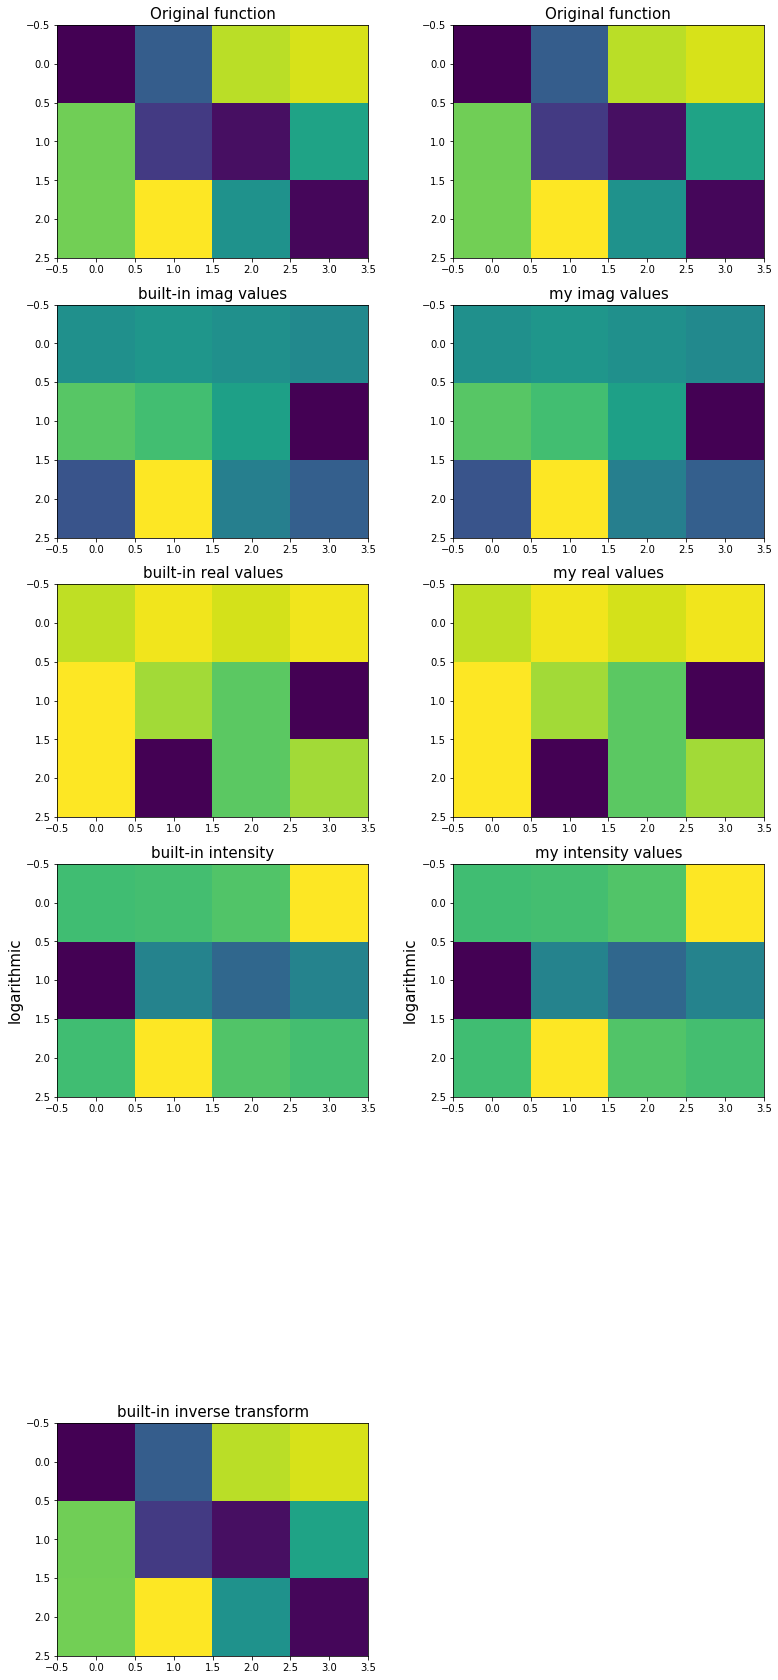

In [115]:
plt.subplots(figsize=(13,30))
plt.subplot(6,2,1)
plt.title('Original function', fontsize=15)
# plt.contourf(Z)
plt.imshow(Z)

plt.subplot(6,2,3)
plt.title('built-in imag values', fontsize=15)
plt.imshow(Zf.imag)

plt.subplot(6,2,5)
plt.title('built-in real values', fontsize=15)
plt.imshow(Zf.real)

plt.subplot(6,2,7)
plt.title('built-in intensity', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.imshow(np.log(np.abs(np.fft.fftshift(Zf))**2))

# plt.subplot(6,2,9)
# plt.title('built-in phase', fontsize=15)
# plt.plot(k,np.angle(y_fft))

plt.subplot(6,2,11)
plt.title('built-in inverse transform', fontsize=15)
# plt.contourf(iZf.real)
plt.imshow(iZf.real)



plt.subplot(6,2,2)
plt.title('Original function', fontsize=15)
# plt.contourf(Z)
plt.imshow(Z)

plt.subplot(6,2,4)
plt.title('my imag values', fontsize=15)
plt.imshow(Ztransformed.imag)

plt.subplot(6,2,6)
plt.title('my real values', fontsize=15)
plt.imshow(Ztransformed.real)

plt.subplot(6,2,8)
plt.title('my intensity values', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.imshow(np.log(np.abs(np.fft.fftshift(Ztransformed))**2))

# plt.subplot(6,2,10)
# plt.title('my phase', fontsize=15)
# plt.plot(ky,np.angle(y2_coefficients))

# plt.subplot(6,2,12)
# plt.title('my inverse transform', fontsize=15)
# plt.plot(x,y2_inverse)
plt.show()

In [58]:
print(Z, '\n\n\n', np.sum(Z,axis=1))

[[-0.99060736 -0.41211849  0.7568025   0.84147098]
 [ 0.53657292 -0.6569866  -0.90929743  0.14112001]
 [ 0.54402111  0.95892427  0.         -0.95892427]] 


 [ 0.19554764 -0.8885911   0.54402111]


In [147]:
complex_coefficients = Zf
ifft_piece = np.empty(np.shape(complex_coefficients))
second_ifft_piece = np.empty(np.shape(complex_coefficients))
first_ifft_of_f = np.empty(np.shape(complex_coefficients), dtype=np.complex)
second_ifft_of_f = np.empty(np.shape(complex_coefficients), dtype=np.complex)

Nrow = np.size(complex_coefficients, 0) # num rows
Ncol = np.size(complex_coefficients, 1) # num columns
xr = np.arange(0,Nrow,1)
xc = np.arange(0,Ncol,1)
xr = np.reshape(xr,(Nrow,1))

for i in range(0,Nrow):
    for n in range(0,Ncol):
        ifft_piece = (1/(Ncol*Nrow))*complex_coefficients[i,n]*np.exp(n*1j*xc*2*np.pi/Ncol)#2*np.pi*(i*xr/Nrow + n*xc/Ncol)
        first_ifft_of_f[i,n] = sum(ifft_piece)
for i in range(0,Ncol):
    for n in range(0,Nrow):
        ifft_piece = (1/(Ncol*Nrow))*first_ifft_of_f[n,i]*np.exp(n*1j*xr*2*np.pi/Nrow)#(1j)*xr*xc*2*np.pi/(Ncol*Nrow)
        second_ifft_of_f[n,i] = sum(ifft_piece)
        
#         ifft_piece = (1/(Ncol*Nrow))*first_ifft_of_f[n,i]*np.exp((1j)*xr*xc*2*np.pi/(Ncol*Nrow))#n*i*(1j)*xr*xc*2*np.pi/(Ncol*Nrow)
#         second_ifft_of_f += ifft_piece

# #             integrand = function[i,:]*np.exp(n*(-1j)*xc*2*np.pi/Ncol)
#             first_transform[i,n] = sum(integrand)
# for i in range(0,Ncol):
#     for n in range(0,Nrow):
#         second_ifft_piece = first_ifft_of_f[n,i]*np.exp(n*(1j)*2*xr*np.pi/Nrow)
#         second_ifft_of_f += second_ifft_piece
        


In [148]:
print(xc,'\n\n\n',xr,'\n\n\n',xc*xr)
XC, XR = np.meshgrid(xc,xr)
print('\n\n\n',XC,'\n\n\n',XR,'\n\n\n',XC*XR)

[0 1 2 3] 


 [[0]
 [1]
 [2]] 


 [[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]]



 [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]] 


 [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]] 


 [[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]]


In [149]:
print('iZf\n',iZf,'\n\n\nfirst_ifft_of_f\n', first_ifft_of_f,'\n\n\nsecond_ifft_of_f\n', second_ifft_of_f)

iZf
 [[ -9.90607356e-01+0.j  -4.12118485e-01+0.j   7.56802495e-01+0.j
    8.41470985e-01+0.j]
 [  5.36572918e-01+0.j  -6.56986599e-01+0.j  -9.09297427e-01+0.j
    1.41120008e-01+0.j]
 [  5.44021111e-01+0.j   9.58924275e-01+0.j   4.44089210e-16+0.j
   -9.58924275e-01+0.j]] 


first_ifft_of_f
 [[ -4.96741165e-02 +0.00000000e+00j  -1.73472348e-18 -3.46944695e-18j
    0.00000000e+00 +4.89977771e-19j   1.04083409e-17 +0.00000000e+00j]
 [  1.22610878e-01 +4.13559523e-01j   0.00000000e+00 -6.93889390e-18j
    0.00000000e+00 -2.08166817e-17j  -1.11022302e-16 -2.22044605e-16j]
 [  1.22610878e-01 -4.13559523e-01j   2.77555756e-17 -1.11022302e-16j
    0.00000000e+00 -2.08166817e-17j   2.77555756e-17 -4.85722573e-17j]] 


second_ifft_of_f
 [[ -1.24185291e-02 +0.00000000e+00j  -4.33680869e-19 -8.67361738e-19j
    0.00000000e+00 +1.22494443e-19j   2.60208521e-18 +0.00000000e+00j]
 [ -1.38777878e-17 -3.46944695e-18j   1.92592994e-34 +9.62964972e-35j
    5.77778983e-34 +3.85185989e-34j   6.16297582e-3